In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [18]:
file_path = "Downloads/train.csv/taxi dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

   trip_distance  rate_code store_and_fwd_flag  payment_type  fare_amount  \
0           9.01          1                  N             1         26.0   
1           0.20          1                  N             1          3.0   
2           9.65          1                  N             1         41.5   
3           9.50          1                  N             1         30.0   
4           5.80          1                  N             1         21.5   

   extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  total_amount  \
0    0.0      0.5        8.14          5.76            0.3         40.70   
1    0.0      0.5        0.75          0.00            0.3          4.55   
2    0.0      0.5        9.61          5.76            0.3         57.67   
3    0.5      0.5        9.25          5.76            0.3         46.31   
4    0.5      0.5        4.56          0.00            0.3         27.36   

   pickup_location_id  dropoff_location_id  year  month  day  day_of_week  \
0  

In [19]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']]) + pd.to_timedelta(df['hour_of_day'], unit='h')

In [20]:
df = df.sort_values(by='datetime')
df.set_index('datetime', inplace=True)

In [21]:
df_daily = df[['total_amount']].resample('D').sum()


In [22]:
model = ExponentialSmoothing(df_daily['total_amount'], trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()

C:\Users\HDC0422279\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
forecast = fit.forecast(7)


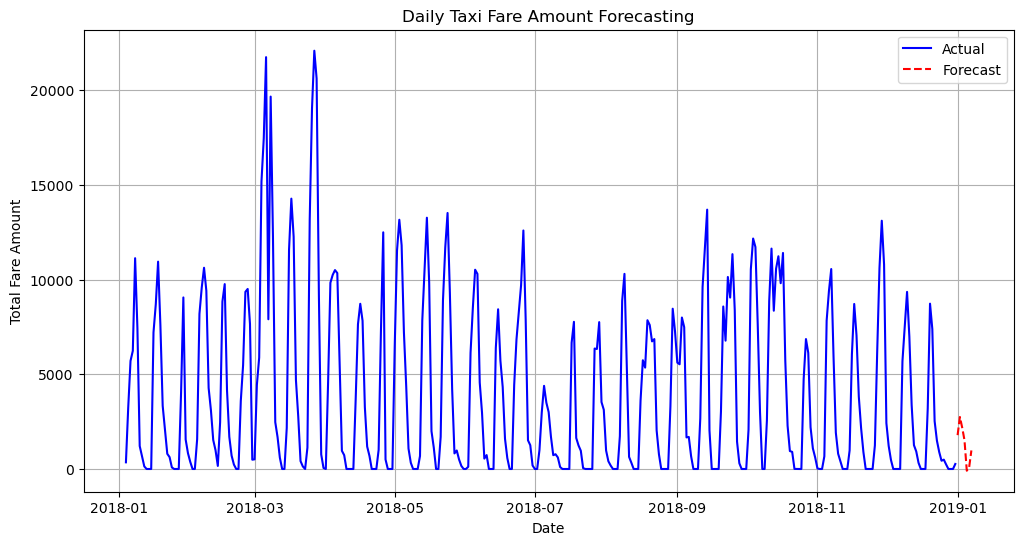

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['total_amount'], label="Actual", color='blue')
plt.plot(forecast.index, forecast, label="Forecast", color='red', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Fare Amount")
plt.title("Daily Taxi Fare Amount Forecasting")
plt.legend()
plt.grid()
plt.show()